# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk(r'.\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\data\sample_submission.csv
.\data\test.csv
.\data\train.csv


# Import data

In [2]:
sample_submission = pd.read_csv(r".\data\sample_submission.csv")
test = pd.read_csv(r".\data\test.csv")
train = pd.read_csv(r".\data\train.csv")

# Compare train with test

In [3]:
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


* Transported col is not given in test set as it should be preticted by model and returned in submission file, like this:

In [5]:
sample_submission.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# Evaluate training data

## 1. Check for missing values

In [6]:
train[train.isnull().all(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


as you can see there is no row full of null

In [7]:
def analize_data(df, data_name="data"):
  print("Analysis of: "+data_name)
  print("Number of objects: ", df.shape[0])
  print("Number of attributes: ", df.shape[1])
  print("Number of objects with at least 1 missing value: %d" % df.isnull().any(axis=1).sum())
  print("Number of missing values in attributes:")
  missing_val_count_by_column = (df.isnull().sum())
  missing_val= (missing_val_count_by_column[missing_val_count_by_column > 0])
  for column, count in missing_val.items():
    print("  %s: %d  (%.2f%%)" % (column, count, count/df.shape[0]*100))
  print()

In [8]:
analize_data(train, "train_data")

Analysis of: train_data
Number of objects:  8693
Number of attributes:  14
Number of objects with at least 1 missing value: 2087
Number of missing values in attributes:
  HomePlanet: 201  (2.31%)
  CryoSleep: 217  (2.50%)
  Cabin: 199  (2.29%)
  Destination: 182  (2.09%)
  Age: 179  (2.06%)
  VIP: 203  (2.34%)
  RoomService: 181  (2.08%)
  FoodCourt: 183  (2.11%)
  ShoppingMall: 208  (2.39%)
  Spa: 183  (2.11%)
  VRDeck: 188  (2.16%)
  Name: 200  (2.30%)



## 2. Change datatype if needed

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
print(train['VIP'].unique())
print(train['CryoSleep'].unique())

[False True nan]
[False True nan]


In [11]:
train['VIP'] = train['VIP'].astype('bool')
train['CryoSleep'] = train['CryoSleep'].astype('bool')

Then we need to split *Cabin* attribute into 3 seperate attributes: *deck*, *num* and *side* as it is mentioned in dataset describtion.

In [12]:
train.dropna(subset=['Cabin'], inplace=True)
tmp = train['Cabin'].str.split('/', expand=True)
tmp.columns = ['Cabin_deck', 'Cabin_number', 'Cabin_side']
tmp_indx = train.columns.get_loc('Cabin')
for i, column in enumerate(tmp.columns):
    train.insert(tmp_indx+1+i, column, tmp[column])
train['Cabin_number']=train['Cabin_number'].astype('int')
train.drop('Cabin', axis=1, inplace=True)
train.replace({'P': "Port", 'S': "Starboard"}, inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B,0,Port,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F,0,Starboard,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A,0,Starboard,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A,0,Starboard,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F,1,Starboard,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 3. Exploratory data analysis

### 1. Split to numerical and categorical data

In [13]:
for col in train:
    print(f"{col} - {train[col].nunique()}")

PassengerId - 8494
HomePlanet - 3
CryoSleep - 2
Cabin_deck - 8
Cabin_number - 1817
Cabin_side - 2
Destination - 3
Age - 80
VIP - 2
RoomService - 1256
FoodCourt - 1479
ShoppingMall - 1105
Spa - 1307
VRDeck - 1291
Name - 8277
Transported - 2


I put the columns that has not so much categories to train_cat

In [14]:
train_num = train[['Cabin_number', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
train_cat = train[['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP', 'CryoSleep']]

I abandoned id and name because these data is useless.

### 2. Draw chart for categorical and numerical data

### Categorical data charts

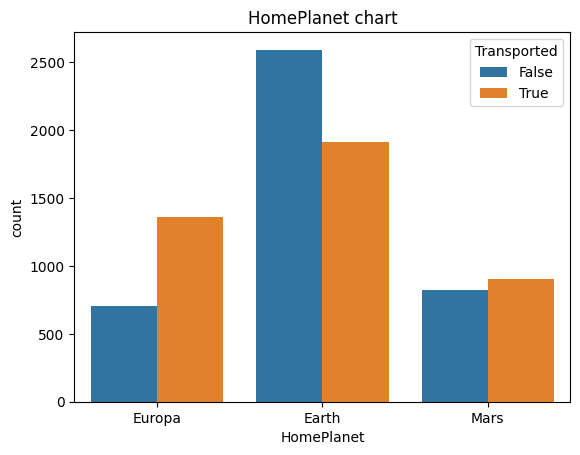

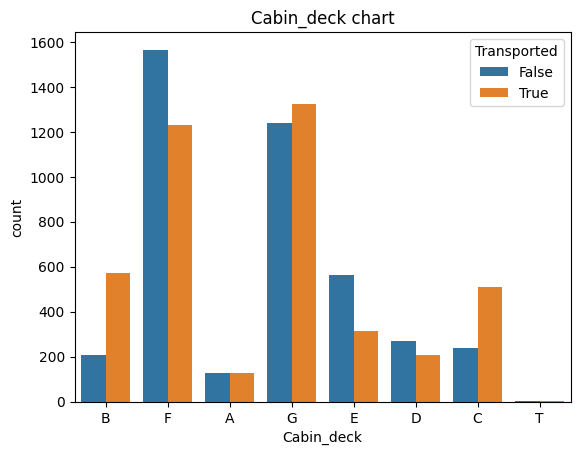

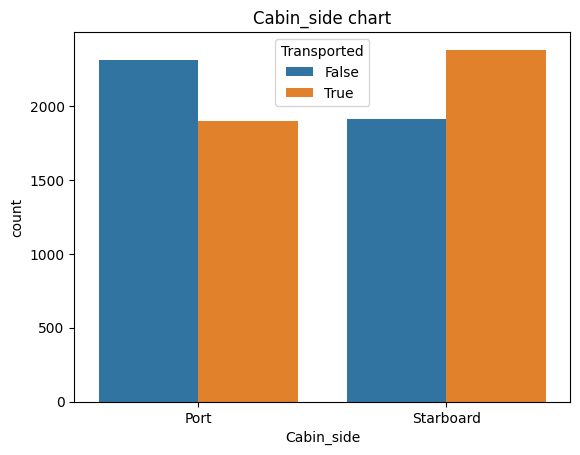

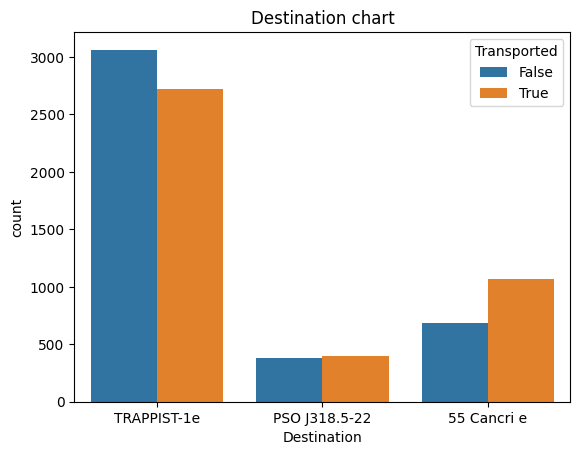

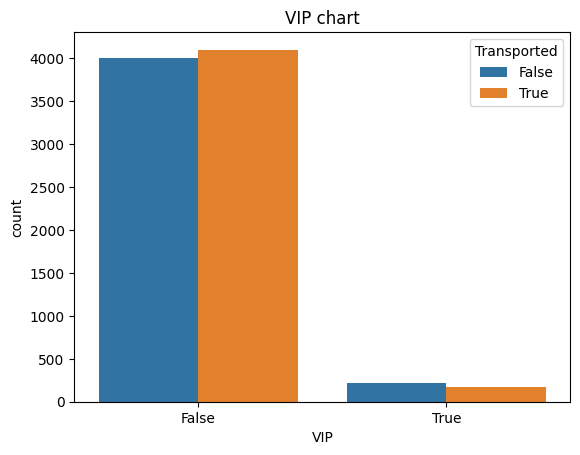

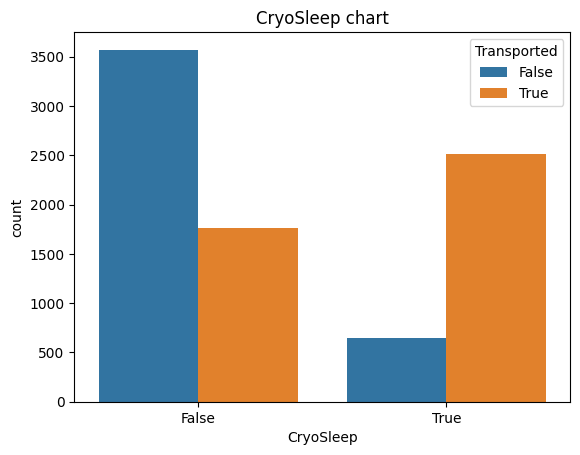

In [15]:
for column in train_cat:
    sns.countplot(
        data=train,
        x=column,
        hue="Transported"
    )
    plt.title(column+" chart")
    plt.show()

### 3. Numerical data charts

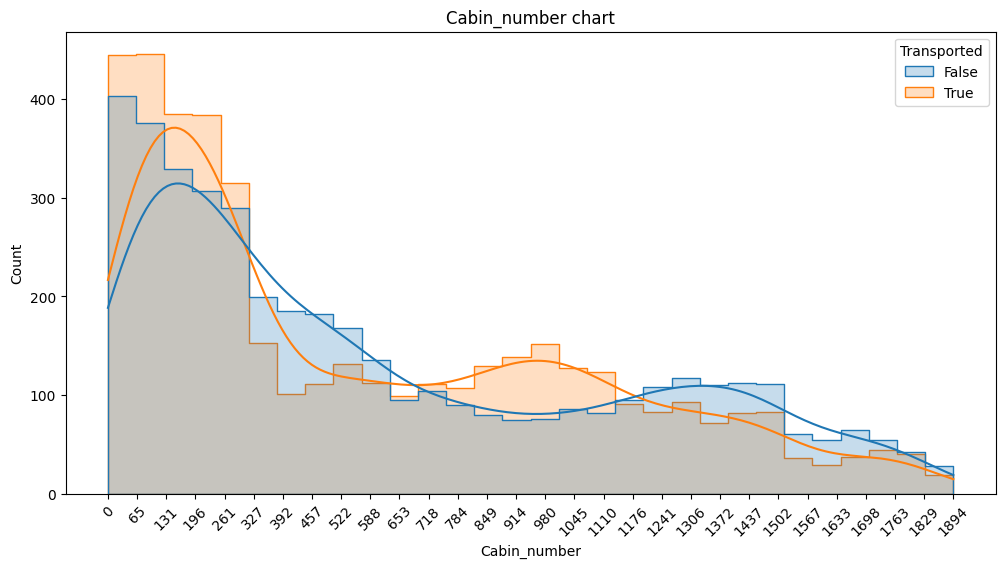

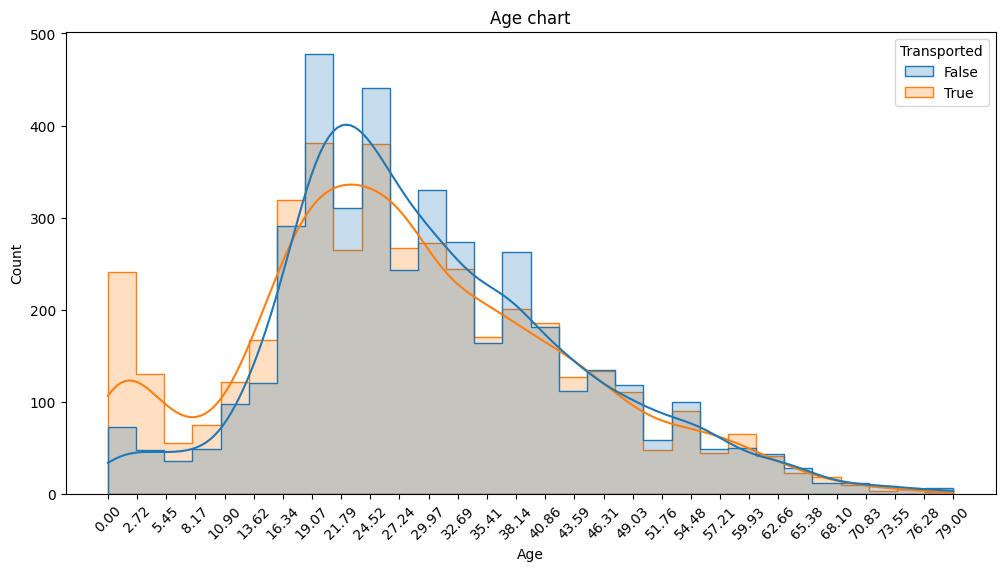

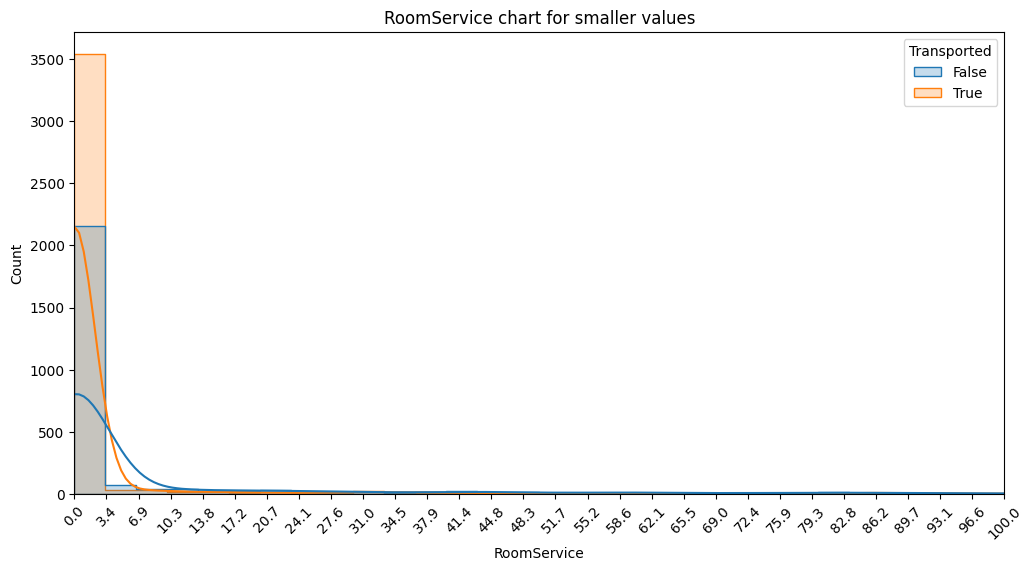

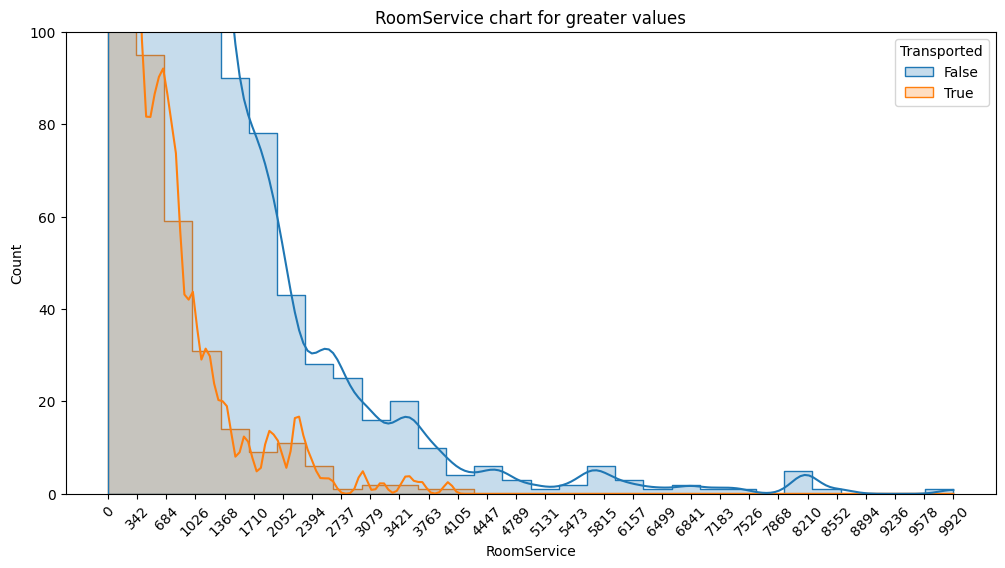

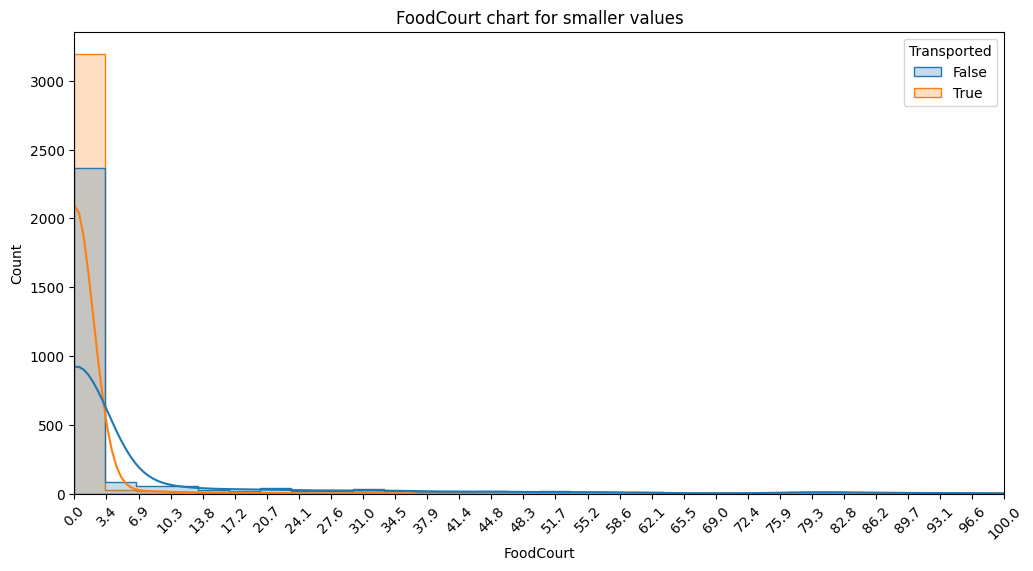

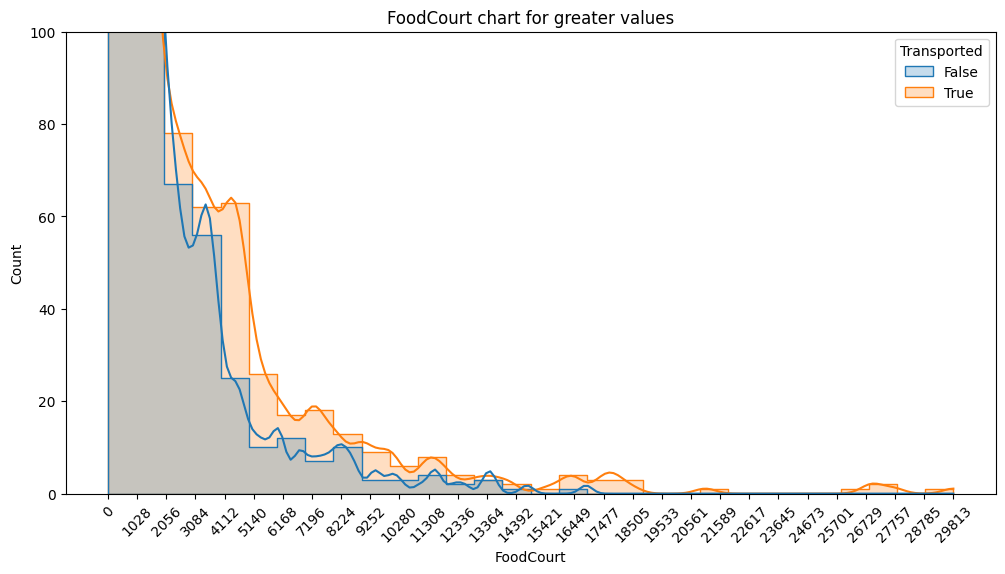

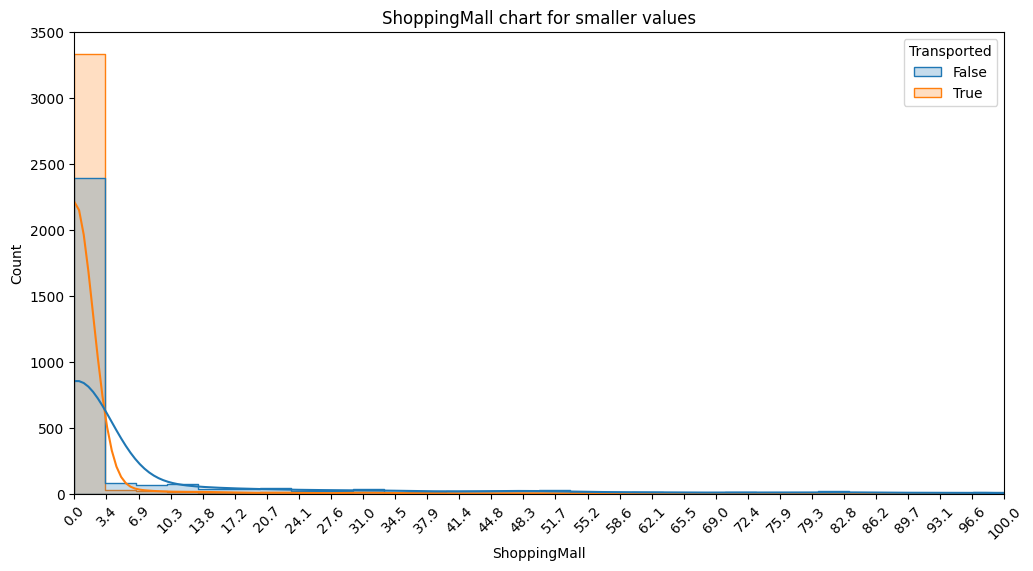

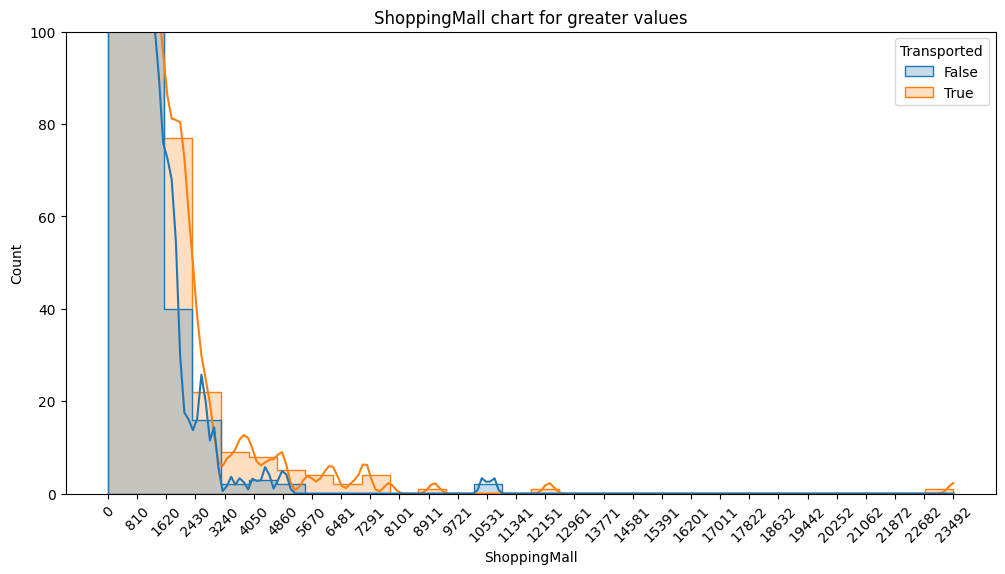

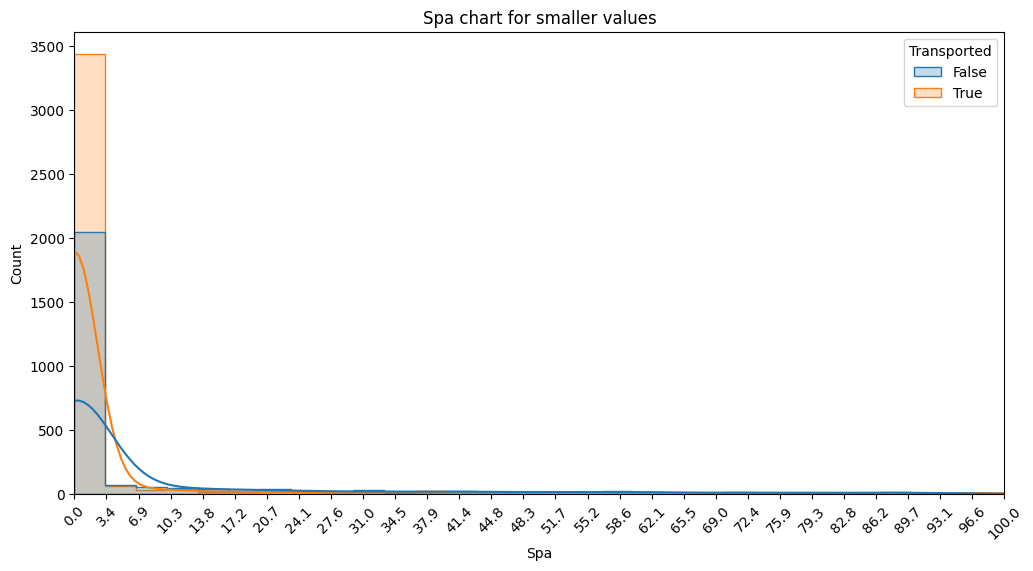

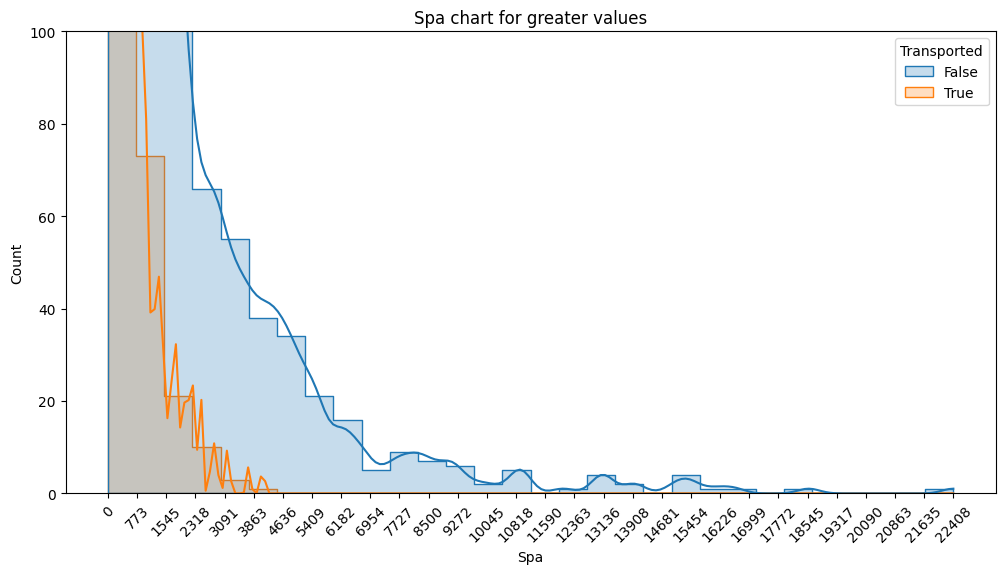

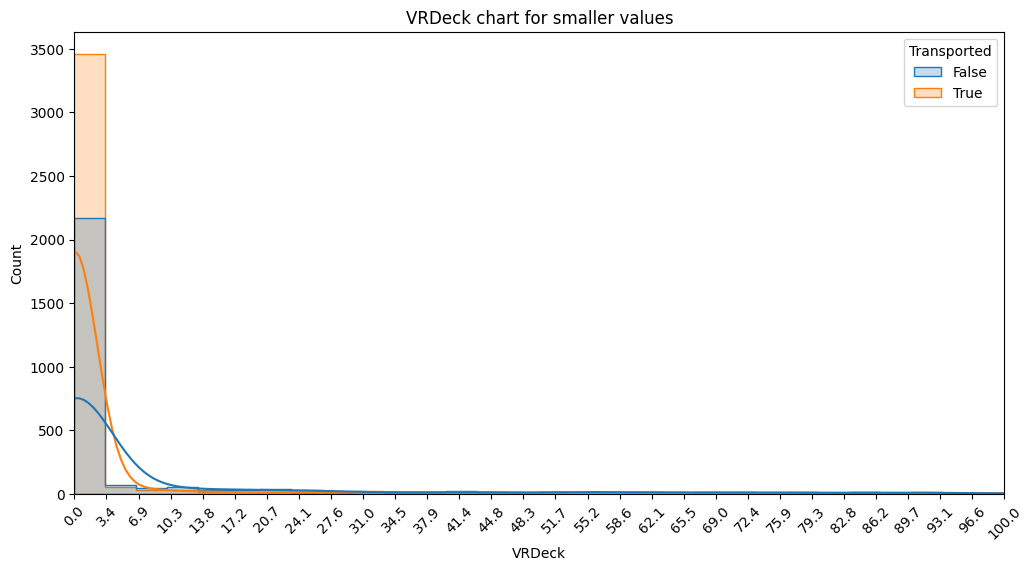

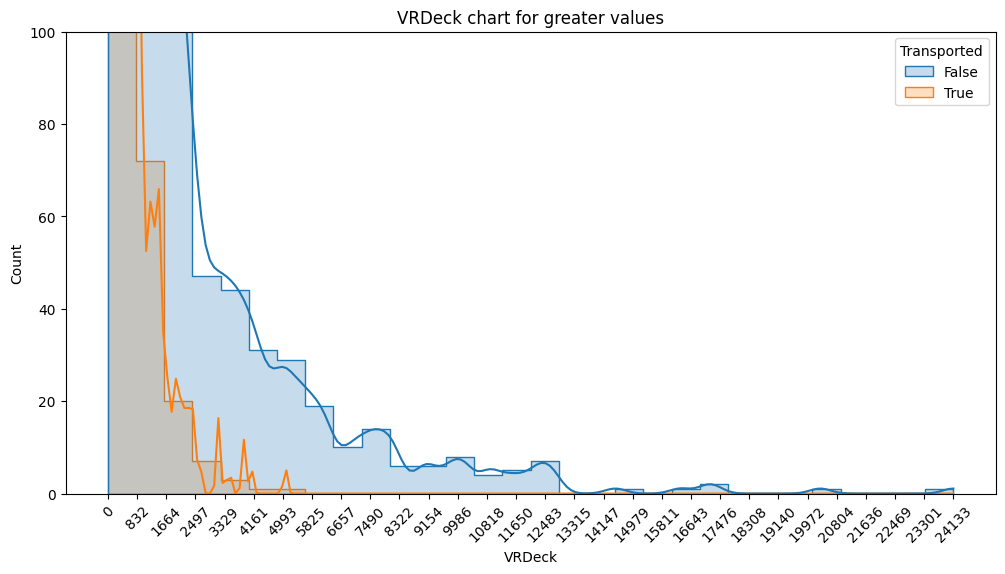

In [16]:
def draw_plot_with_limits(column, limit_x=None, limit_y=None, title="chart"):
    plt.figure(figsize=(12, 6))
    if limit_x:
        data_to_plot = train[train[column] <= limit_x]
    else:
        data_to_plot = train
    number_of_unique = data_to_plot[column].nunique()
    freq_of_most_freq_value = data_to_plot[column].value_counts()[0]
    if number_of_unique > 30:
        ticks = np.linspace(data_to_plot[column].min(), data_to_plot[column].max(), 30)
    else:
        ticks = sorted(data_to_plot[column].unique())
    
    sns.histplot(
        data=data_to_plot,
        x=column,
        hue="Transported",
        kde=True,
        bins=30,
        element="step",
    ).set_xticks(ticks)
    plt.title(f'{column} {title}')
    plt.xticks(rotation=45)
    if limit_y:
        plt.ylim(0, limit_y)
    if limit_x:
        plt.xlim(0, limit_x)
    plt.show()

for column in train_num:
    freq_of_most_freq_value = train[column].value_counts()[0]
    if freq_of_most_freq_value > 1000:
        draw_plot_with_limits(column, limit_x=100, title="chart for smaller values")
        draw_plot_with_limits(column, limit_y=100, title="chart for greater values")
    else:
        draw_plot_with_limits(column)

Let's count expenses of each passenger

In [17]:
spent_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train['Expenses'] = train[spent_columns].sum(axis=1)

Check corelations between expenses and categorical columns

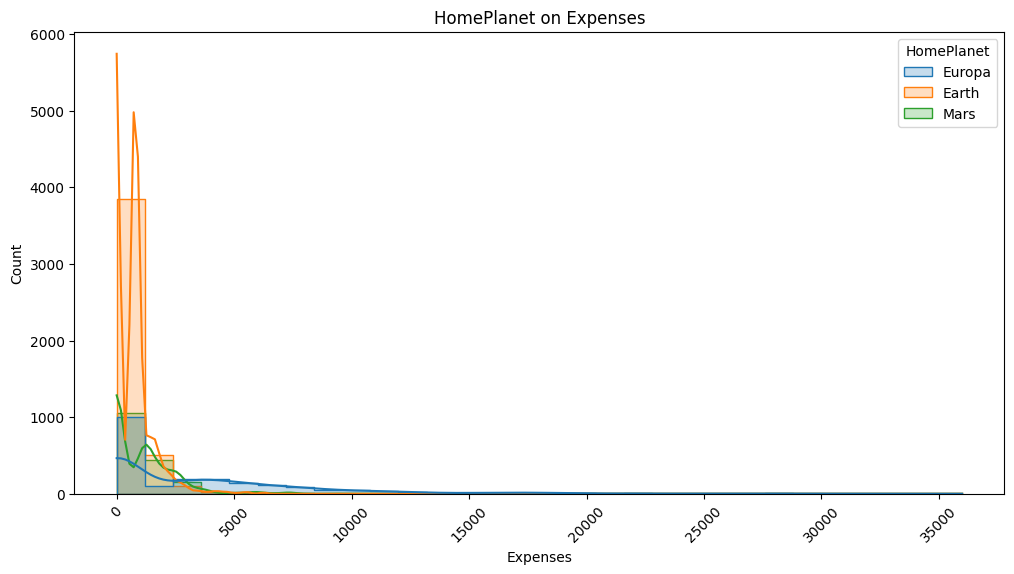

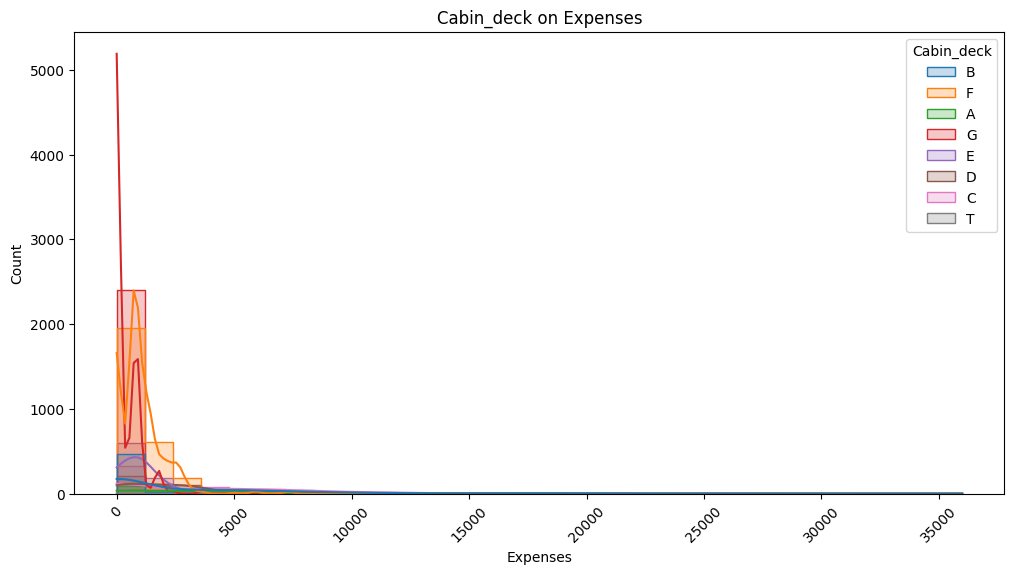

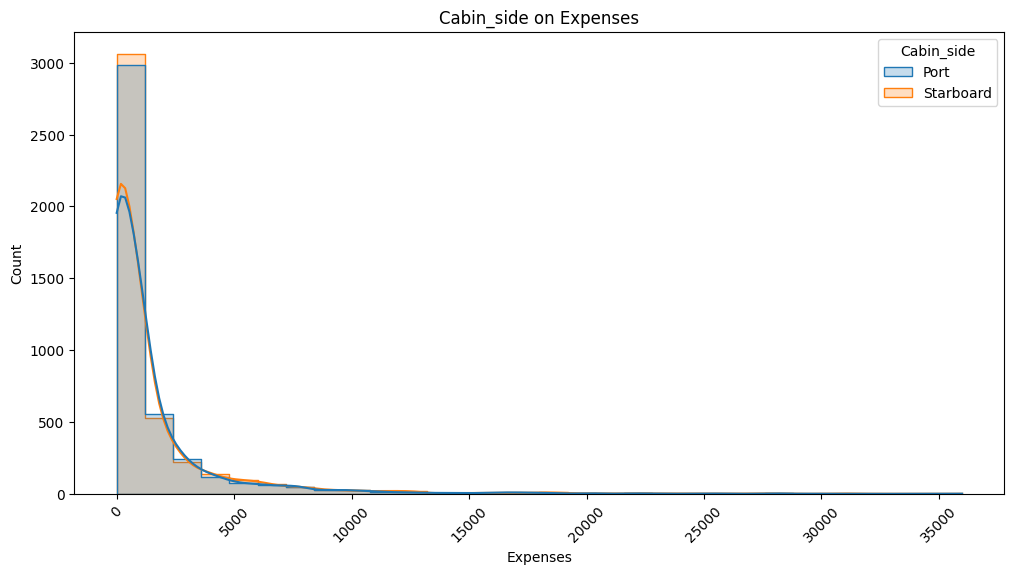

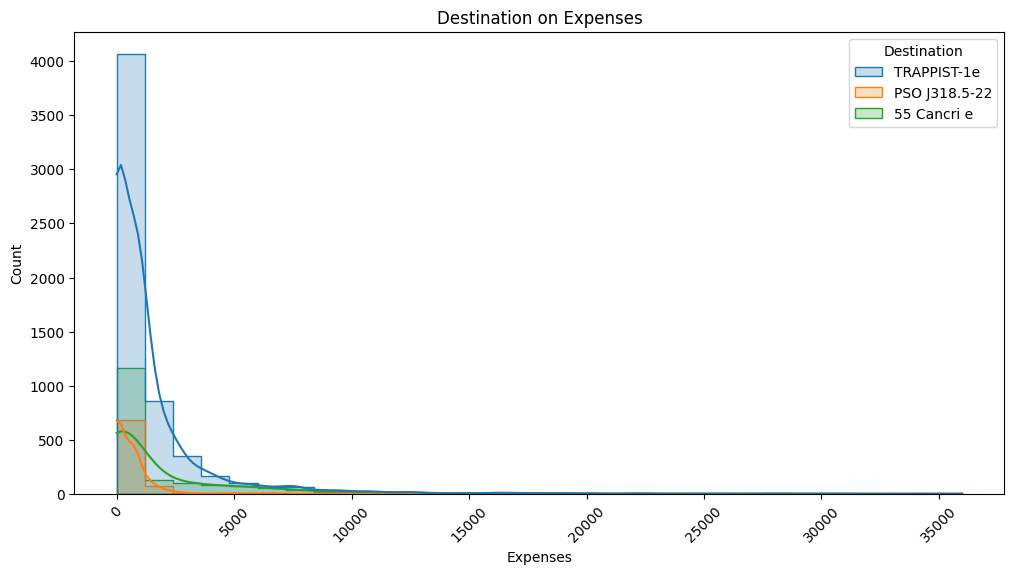

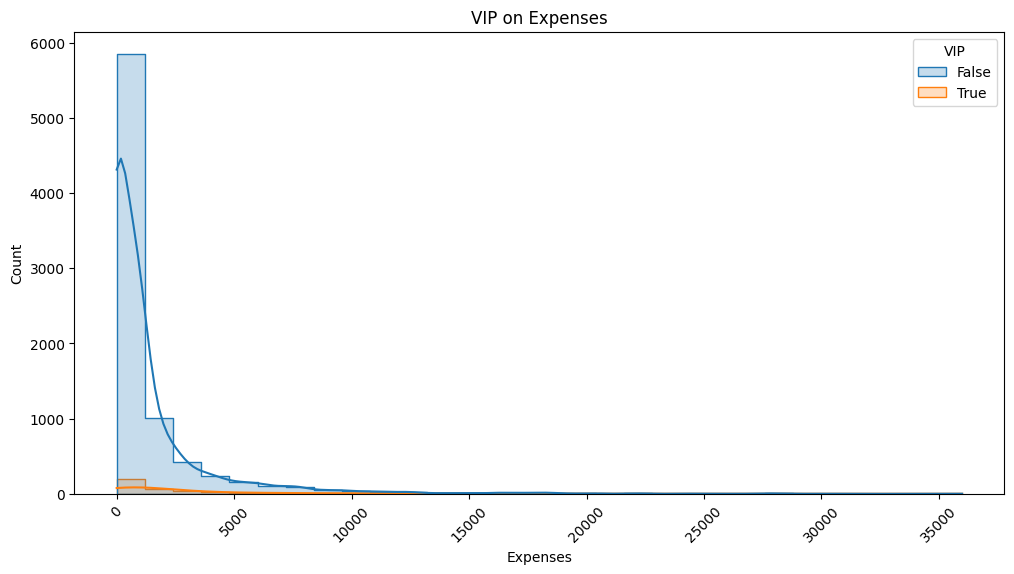

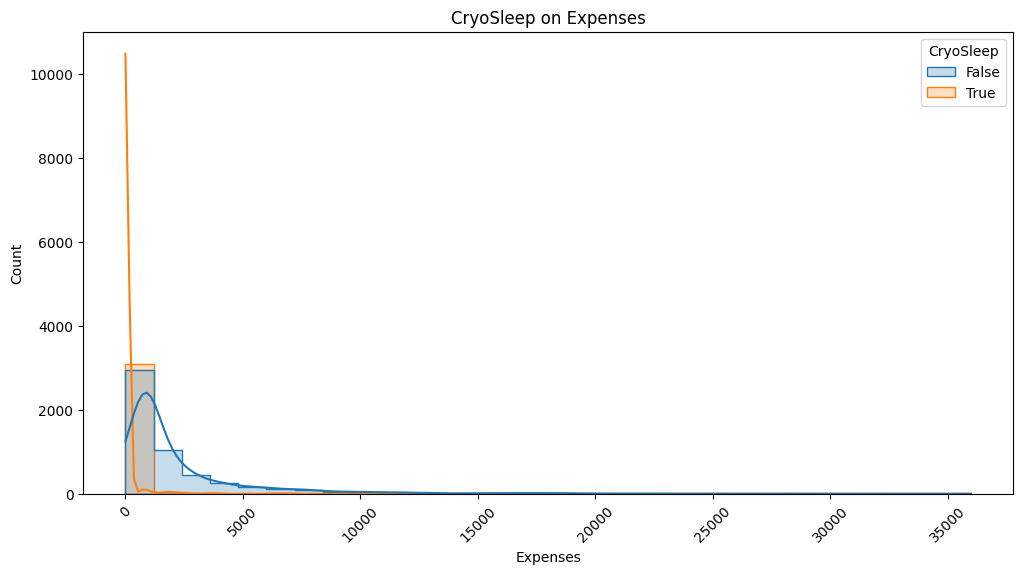

In [18]:
columns_to_check = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'VIP', 'CryoSleep']

for column in columns_to_check:
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=train,
        x="Expenses",
        hue=column,
        kde=True,
        bins=30,
        element="step",
    )
    plt.title(f'{column} on Expenses')
    plt.xticks(rotation=45)
    plt.show()

There is not big impact of categorical data on expenses, except cryosleep, where we can see that people put into cryosleep had significantly less expenses.

#### Boxplot of numerical values

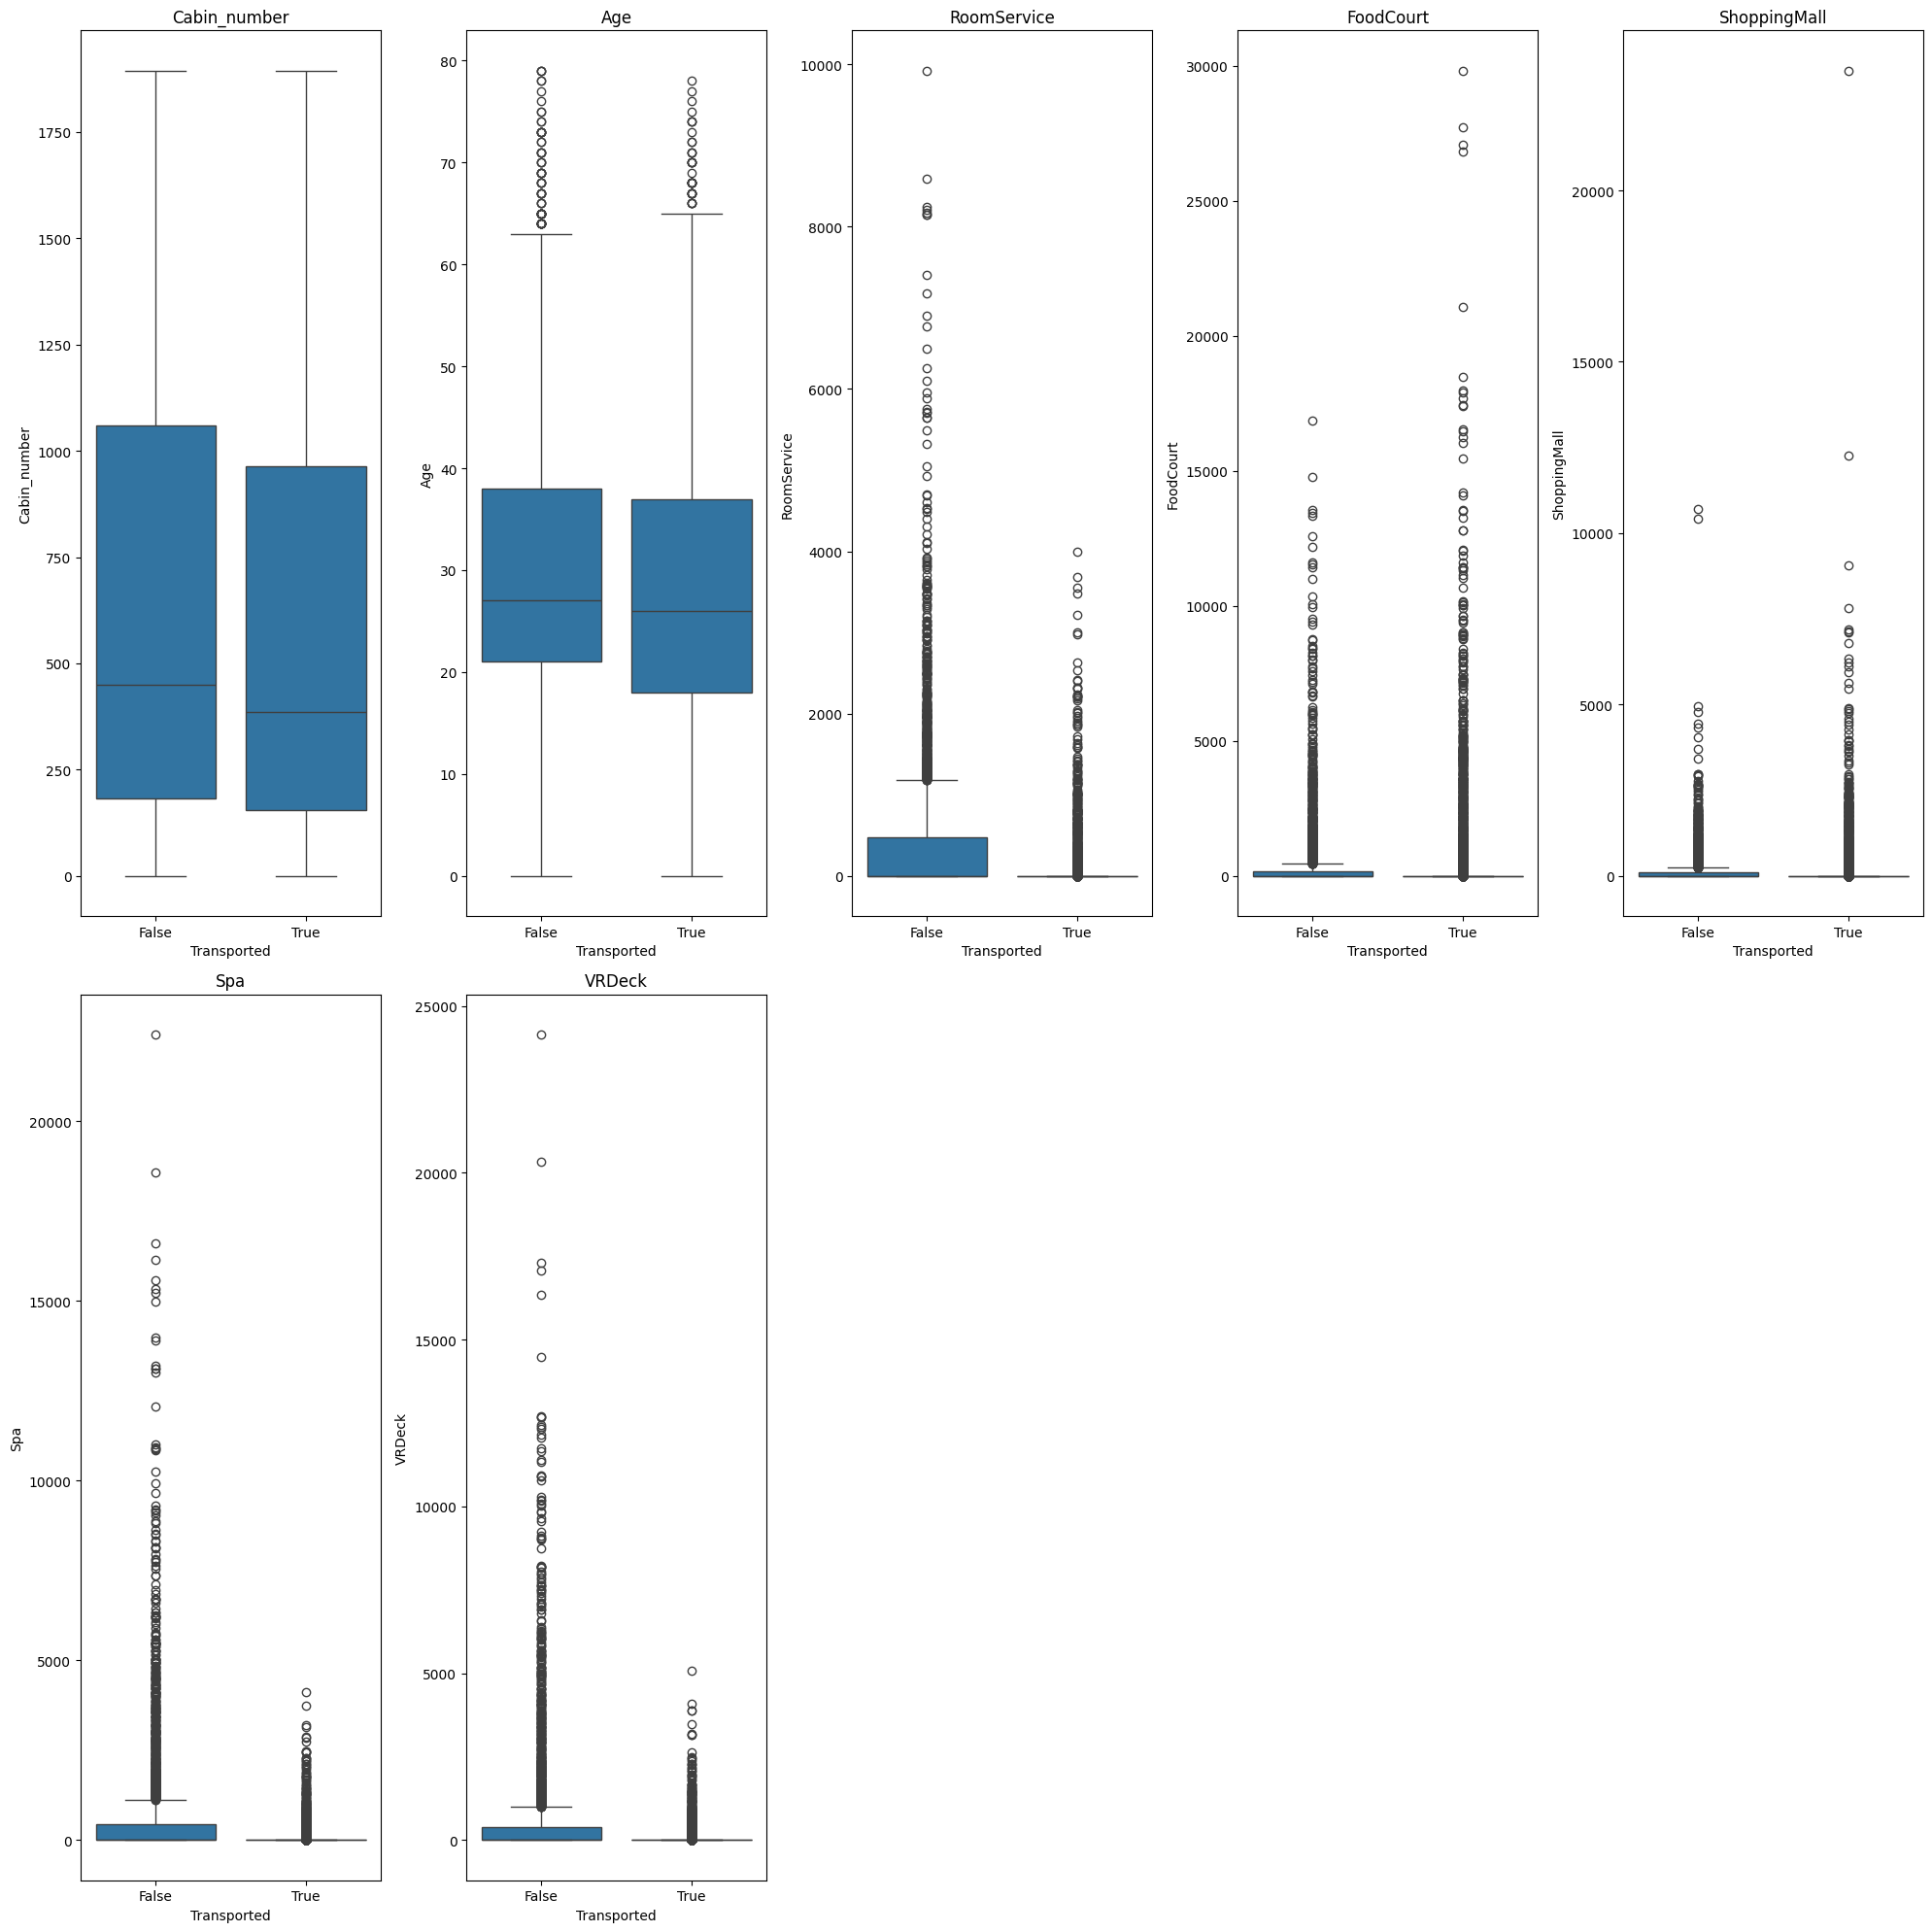

In [19]:
import math
plt.figure(figsize=(20,20))
MAX_WIDTH = 5

for i, column in enumerate(train_num.columns):
    plt.subplot(math.ceil(len(train_num.columns) / MAX_WIDTH), MAX_WIDTH, i + 1)
    sns.boxplot(data=train, x='Transported', y=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

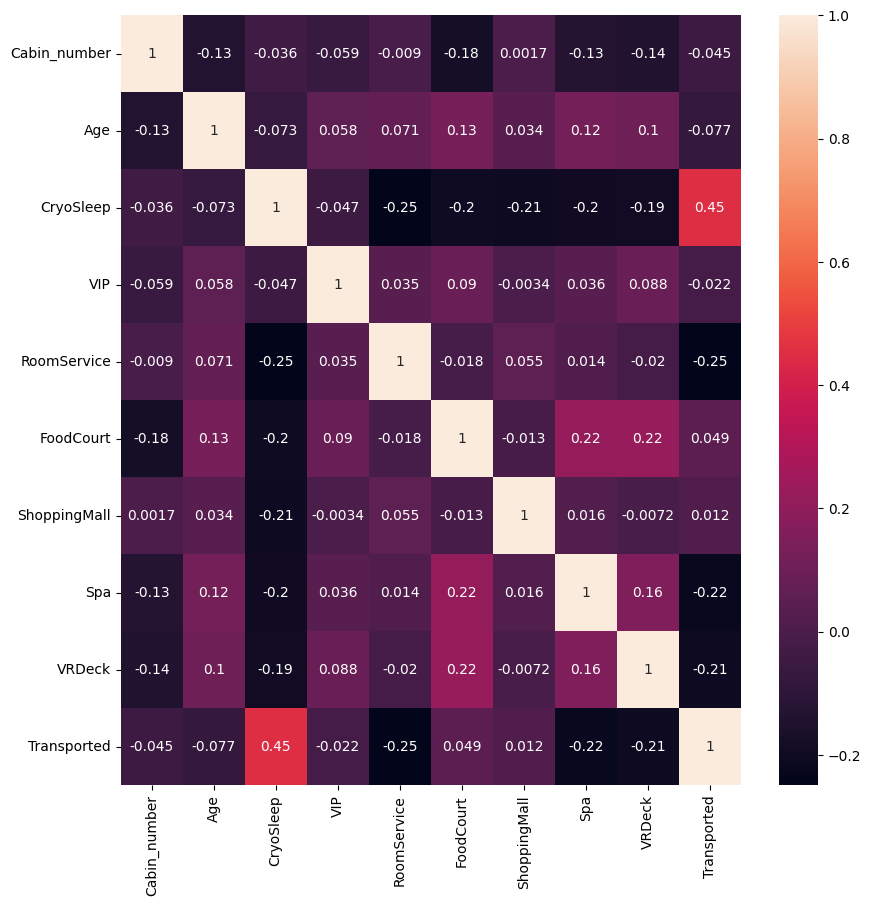

In [20]:
train_tmp = train[['Cabin_number', 'Age','CryoSleep','VIP','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].copy()
train_tmp[['VIP','CryoSleep', 'Transported']] = train_tmp[['VIP','CryoSleep', 'Transported']].astype('int')
plt.figure(figsize = (10,10))
sns.heatmap(train_tmp.corr(),annot = True)
plt.show()

Based on the heatmap, a slight positive correlation can be observed between attributes *CryoSleep* and *Transported*.

## 3. Null handling
To handle null values we are going to test serveral approaches such as:
- deleting null values
- imputation of median, mean or mode

Firstly lets once again analize our dataset.

In [21]:
analize_data(train, "train_data")

Analysis of: train_data
Number of objects:  8494
Number of attributes:  17
Number of objects with at least 1 missing value: 1551
Number of missing values in attributes:
  HomePlanet: 195  (2.30%)
  Destination: 178  (2.10%)
  Age: 175  (2.06%)
  RoomService: 177  (2.08%)
  FoodCourt: 178  (2.10%)
  ShoppingMall: 206  (2.43%)
  Spa: 181  (2.13%)
  VRDeck: 184  (2.17%)
  Name: 198  (2.33%)



At first, drop name column as it is not needed

In [22]:
if "Name" in train.columns:    
    train = train.drop(columns=["Name"])
else:
    print("Column was already removed")

### 1. Delete rows that contains any null value

In [23]:
train_after_deletion = train.dropna(how='any')
analize_data(train_after_deletion, "train_after_deletion")
print(f'Rows lost because of deletion: {len(train) - len(train_after_deletion)}')

Analysis of: train_after_deletion
Number of objects:  7111
Number of attributes:  16
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:

Rows lost because of deletion: 1383


### 2. Use extended imputation

In order to remove missing data we will perform operations as follows:
- HomePlanet: extended imputation of the mode
- CryoSleep: extended imputation, filling nulls with False
- Destination: extended imputation of the mode
- Age: imputation of the mean
- RoomService: extended imputation of the median
- FoodCourt: extended imputation of the median
- Spa: extended imputation of the median
- VRDeck: extended imputation of the median

In addition to this, we will set PassengerId as index of dataframe.

In [24]:
def create_extended_imputation_extra_column(df, col_names):
  for col_name in col_names:
      if col_name in df.columns:
        df.insert(df.columns.get_loc(col_name)+1, (col_name+'_was_missing'),0)
        df[col_name+'_was_missing']= df[col_name+'_was_missing'].astype('bool')
        df[col_name+'_was_missing']= df[col_name].isnull()
      else:
          print("Attribute %s is not present in specified DataFrame!" % col_name)
          return
  return df

In [25]:
def extended_imputation_with_fill_values(df, col_names, fill_values):
    df = create_extended_imputation_extra_column(df, col_names)
    for i, col_name in enumerate(col_names):
        df[col_name].fillna(fill_values[i], inplace=True)
    return df

In [26]:
from sklearn.impute import SimpleImputer
def extended_imputation_with_strategy(df, col_names, strategy_value):
    df = create_extended_imputation_extra_column(df, col_names)
    imp = SimpleImputer(strategy=strategy_value)
    imp.fit(df[col_names])
    df[col_names]= imp.transform(df[col_names])
    return df

In [27]:
def clean_space_data(df):
    clean_data = df.copy()
    clean_data = clean_data.set_index('PassengerId')
    clean_data = extended_imputation_with_fill_values(clean_data, ['CryoSleep'], [False])
    clean_data = extended_imputation_with_strategy(clean_data, ['HomePlanet', 'Destination', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], 'most_frequent')
    clean_data = extended_imputation_with_strategy(clean_data, ['Age'], 'mean')
    return clean_data
train_after_imputation = clean_space_data(train)
test_after_imputation = clean_space_data(test)


C:\Users\filip\AppData\Local\Temp\ipykernel_27296\3136384779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col_name].fillna(fill_values[i], inplace=True)
C:\Users\filip\AppData\Local\Temp\ipykernel_27296\3136384779.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [28]:
analize_data(train_after_imputation)
train_after_imputation.head()

Analysis of: data
Number of objects:  8494
Number of attributes:  24
Number of objects with at least 1 missing value: 0
Number of missing values in attributes:



,HomePlanet,HomePlanet_was_missing,CryoSleep,CryoSleep_was_missing,Cabin_deck,Cabin_number,Cabin_side,Destination,Destination_was_missing,Age,...,FoodCourt,FoodCourt_was_missing,ShoppingMall,ShoppingMall_was_missing,Spa,Spa_was_missing,VRDeck,VRDeck_was_missing,Transported,Expenses
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,Europa,False,False,False,B,0,Port,TRAPPIST-1e,False,39.0,...,0.0,False,0.0,False,0.0,False,0.0,False,False,0.0
0002_01,Earth,False,False,False,F,0,Starboard,TRAPPIST-1e,False,24.0,...,9.0,False,25.0,False,549.0,False,44.0,False,True,736.0
0003_01,Europa,False,False,False,A,0,Starboard,TRAPPIST-1e,False,58.0,...,3576.0,False,0.0,False,6715.0,False,49.0,False,False,10383.0
0003_02,Europa,False,False,False,A,0,Starboard,TRAPPIST-1e,False,33.0,...,1283.0,False,371.0,False,3329.0,False,193.0,False,False,5176.0
0004_01,Earth,False,False,False,F,1,Starboard,TRAPPIST-1e,False,16.0,...,70.0,False,151.0,False,565.0,False,2.0,False,True,1091.0


In this way we got rid of missing data and at the same time retained information if particular data was missing.

### 3. Prepare data for testing

Convert boolean columns to integer

In [29]:
from sklearn.preprocessing import LabelEncoder

def transform_cat_to_num(df, category_list):
    label_encoder = LabelEncoder()
    for column in category_list:
        df[column] = label_encoder.fit_transform(df[column])
    return df

In [30]:
train_after_imputation[['HomePlanet_was_missing','CryoSleep',
       'CryoSleep_was_missing', 'Destination_was_missing', 'Age_was_missing',
       'VIP', 'RoomService_was_missing',
       'FoodCourt_was_missing', 'ShoppingMall_was_missing', 'Spa_was_missing', 'VRDeck_was_missing', 'Transported']] = train_after_imputation[['HomePlanet_was_missing', 'CryoSleep',
       'CryoSleep_was_missing', 'Destination_was_missing', 'Age_was_missing',
       'VIP', 'RoomService_was_missing',
       'FoodCourt_was_missing', 'ShoppingMall_was_missing', 'Spa_was_missing', 'VRDeck_was_missing', 'Transported']].astype('int')

train_after_deletion[['CryoSleep', 'VIP']] = train_after_deletion[['CryoSleep', 'VIP']].astype('int')

categorical_columns_list = ['HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination']
train_after_imputation = transform_cat_to_num(train_after_imputation, categorical_columns_list)
train_after_deletion = transform_cat_to_num(train_after_deletion, categorical_columns_list)

data_for_testing = [train_after_imputation, train_after_deletion]
data_for_testing = {'train_after_imputation' : train_after_imputation, "train_after_deletion" : train_after_deletion}
train_after_deletion.head()

C:\Users\filip\AppData\Local\Temp\ipykernel_27296\1424927030.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_after_deletion[['CryoSleep', 'VIP']] = train_after_deletion[['CryoSleep', 'VIP']].astype('int')
C:\Users\filip\AppData\Local\Temp\ipykernel_27296\2089700536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\filip\AppData\Local\Temp\ipykernel_27296\2089700536.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,PassengerId,HomePlanet,CryoSleep,Cabin_deck,Cabin_number,Cabin_side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Expenses
0,0001_01,1,0,1,0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0
1,0002_01,0,0,5,0,1,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,736.0
2,0003_01,1,0,0,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,10383.0
3,0003_02,1,0,0,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,5176.0
4,0004_01,0,0,5,1,1,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1091.0


Our data is ready to go, now we need to specify our models

## Machine learning models

In [31]:
import warnings
import itertools
import pandas as pd
from sklearn.metrics import accuracy_score

def model_performance_test(model_class, parametr_dict, splited_data):
    X_train, X_valid, y_train, y_valid = splited_data
    results = []
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        combinations = list(itertools.product(*parametr_dict.values()))
        number_of_iterations = len(combinations)
        calculation_counter = 0
        error_counter = 0
        for combo in combinations:
            parametrs = dict(zip(parametr_dict.keys(), combo))
            try:
                model = model_class(**parametrs)
                model.fit(X_train, y_train)
                prediction = model.predict(X_valid)
                accuracy = accuracy_score(y_valid, prediction)
                parametrs['accuracy'] = accuracy
                results.append(parametrs)
            except Exception as e:
                error_counter += 1
            calculation_counter += 1
            print(f"\r{calculation_counter}/{number_of_iterations}  (errors:{error_counter})", end="", flush=True)
    print()
    results_df = pd.DataFrame(results)
    print(results_df.sort_values(by='accuracy', ascending=False).head())
    if results_df.empty:
        print("\nNo valid models were found. (Every parametr combination resulted in error)")
    else:
        best_performance = results_df.loc[results_df['accuracy'].idxmax()]
        print("\nBest performance for:\n" + str(best_performance))


### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import itertools
import warnings

penalty_list = ['l2','l1','elasticnet',None]
C_list = [0.01,0.1,1,10,100]
solver_list = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
max_iter_list = [1000]
multi_class_list = ['ovr','multinomial']
class_weight_list = ['balanced', None]

parametr_dictionary = {
    'penalty': penalty_list,
    'C': C_list,
    'solver': solver_list,
    'max_iter': max_iter_list,
    'multi_class': multi_class_list,
    'class_weight': class_weight_list,
    'random_state' : [0]
}

'''
for name, dataframe in data_for_testing.items():
    X  = dataframe.drop('Transported', axis=1)
    y = dataframe['Transported']
    splitted_data = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0)
    print(f'Testing {name}:')
    model_performance_test(LogisticRegression, parametr_dictionary, splitted_data)
    print("\n")
'''

Testing train_after_imputation:
400/400  (errors:200)
   penalty     C     solver  max_iter multi_class class_weight  random_state  \
1       l2  0.01  newton-cg      1000         ovr         None             0   
0       l2  0.01  newton-cg      1000         ovr     balanced             0   
4       l2  0.01      lbfgs      1000         ovr     balanced             0   
90      l1  0.01  liblinear      1000         ovr     balanced             0   
91      l1  0.01  liblinear      1000         ovr         None             0   

    accuracy  
1   0.793996  
0   0.792819  
4   0.791642  
90  0.791642  
91  0.791642  

Best performance for:
penalty                l2
C                    0.01
solver          newton-cg
max_iter             1000
multi_class           ovr
class_weight         None
random_state            0
accuracy         0.793996
Name: 1, dtype: object


Testing train_after_deletion:
75/400  (errors:8)

KeyboardInterrupt: 

### DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

parametr_dictionary = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [50, 100, None],
    'min_samples_split': [20, 5, 2, 1],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [5, 2, None],
    'random_state': [0]
}

'''
for name, dataframe in data_for_testing.items():
    X  = dataframe.drop('Transported', axis=1)
    y = dataframe['Transported']
    splitted_data = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0)
    print(f'Testing {name}:')
    model_performance_test(DecisionTreeClassifier, parametr_dictionary, splitted_data)
    print("\n")
'''

Testing train_after_imputation:
576/576  (errors:144)
   criterion splitter  max_depth  min_samples_split  min_samples_leaf  \
35      gini     best       50.0                  2                10   
47      gini     best      100.0                 20                10   
23      gini     best       50.0                  5                10   
95      gini     best        NaN                  5                10   
83      gini     best        NaN                 20                10   

    max_features  random_state  accuracy  
35           NaN             0  0.790465  
47           NaN             0  0.790465  
23           NaN             0  0.790465  
95           NaN             0  0.790465  
83           NaN             0  0.790465  

Best performance for:
criterion                gini
splitter                 best
max_depth                50.0
min_samples_split          20
min_samples_leaf           10
max_features              NaN
random_state                0
accuracy        

## MLPClassifier

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

hidden_layer_sizes_list = [(10,), (20,)]
activation_list = ['relu', 'tanh']
solver_list = ['adam', 'sgd']
alpha_list = [0.0001, 0.01]
learning_rate_list = ['constant', 'adaptive']
max_iter_list = [500]
batch_size_list = ['auto']
learning_rate_init_list = [0.001]
momentum_list = [0.9]
early_stopping_list = [True]

parametr_dictionary = {
    'hidden_layer_sizes': hidden_layer_sizes_list,
    'activation': activation_list,
    'solver': solver_list,
    'alpha': alpha_list,
    'max_iter': max_iter_list,
    'batch_size': batch_size_list,
    'learning_rate': learning_rate_list,
    'learning_rate_init': learning_rate_init_list,
    'momentum': momentum_list,
    'early_stopping': early_stopping_list,
    'random_state': [0]
}

for name, dataframe in data_for_testing.items():
    X = dataframe.drop('Transported', axis=1)
    y = dataframe['Transported']
    splitted_data = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
    print(f'Testing {name}:')
    model_performance_test(MLPClassifier, parametr_dictionary, splitted_data)
    print("\n")


Testing train_after_imputation:
32/32  (errors:0)
   hidden_layer_sizes activation solver   alpha  max_iter batch_size  \
29              (20,)       tanh    sgd  0.0001       500       auto   
28              (20,)       tanh    sgd  0.0001       500       auto   
27              (20,)       tanh   adam  0.0100       500       auto   
26              (20,)       tanh   adam  0.0100       500       auto   
10              (10,)       tanh   adam  0.0100       500       auto   

   learning_rate  learning_rate_init  momentum  early_stopping  random_state  \
29      adaptive               0.001       0.9            True             0   
28      constant               0.001       0.9            True             0   
27      adaptive               0.001       0.9            True             0   
26      constant               0.001       0.9            True             0   
10      constant               0.001       0.9            True             0   

    accuracy  
29  0.791642  
28  0.

## Data testing
In this step we will evaluate model on our data and check which null handling method preforms better


In [ ]:
from sklearn.model_selection import train_test_split
for df in data_for_testing:
       X  = df.iloc[:,:-1].copy()
       y = df.iloc[:,-1].copy()
       y= y.astype('int')
       X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 , test_size=0.2 , random_state=0)